# **CAR PRICE PREDICTION**

### **PROBLEM STATEMENT**
Create a ML model that eill predict the price of a car givrn its features. Use the CarPrice_Assignment.csv dataset for this purpose.

### **APPROACH**

1. use Linear regression model for predicting car price
2. understand the domain and study the car features to suitably encod the data

### **SOLUTION**

#### **STEP 1** : IMPORTING DEPENDENCIES

In [70]:
# for dealing with dataframes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# for data encoding
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# for model implementation
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# for evaluation
from sklearn.metrics import r2_score


#### **STEP 2**: LOADING THE DATA

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")

**Q**: How does the dataframe look like?

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Q**: How many rows and columns are there in the dataset?

In [4]:
print(f"No. of rows : {data.shape[0]}\nNo. of columns : {data.shape[1]}")

No. of rows : 205
No. of columns : 26


**Q**: What are the columns in the dataset?

In [5]:
j = 0
for i in range(6):
    print(", ".join(data.columns.to_list()[j : j+5]))
    j = j + 5  

car_ID, symboling, CarName, fueltype, aspiration
doornumber, carbody, drivewheel, enginelocation, wheelbase
carlength, carwidth, carheight, curbweight, enginetype
cylindernumber, enginesize, fuelsystem, boreratio, stroke
compressionratio, horsepower, peakrpm, citympg, highwaympg
price


**Q**: Catogerize and explain each of the car features.

**Engine - related features**
<table style="font-size:11px;">
  <tr>
    <th></th>
    <th>Feature</th>
    <th>Description</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>1. </td>
    <td>Engine Location</td>
    <td>place where the engine is located in the car; front or rear</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>2. </td>
    <td>Engine type</td>
    <td>7 different types of engine</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>3. </td>
    <td>Engine size</td>
    <td>engine displacement or size in cubic cms</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>4. </td>
    <td>Stroke</td>
    <td>length of piston movement in the cylinder</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>5. </td>
    <td>Bore ratio</td>
    <td>ratio between cylinder diameter and stroke</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>6. </td>
    <td>Compression ratio</td>
    <td>ratio of cylinder's maximum to minimum volume during compression</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>7. </td>
    <td>Horse power</td>
    <td>power output of the engine</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>8. </td>
    <td>Cylinder number</td>
    <td>Number of cylinders in the engine; takes values 2,3,4,5,6,8</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>9. </td>
    <td>Aspiration</td>
    <td>Indicates how the air for combustion of fuel reaches the engine like; turbo charged or naturally aspirated </td>
    <td>Nominal</td>
  </tr>
  
</table>


**Morphological features**
<table style="font-size:11px;">
  <tr>
  <th></th>
  <th>Feature</th>
  <th>Description</th>
  <th>Type</th>
  </tr>
  <tr>
    <td>1.</th>
    <td>Door Number</th>
    <td>number of doors in the car; 2 or 4</th>
    <td>Nominal</th>
  </tr>
  <tr>
    <td>2.</td>
    <td>Car body</td>
    <td>style of the car body</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>3. </td>
    <td>Wheel base</td>
    <td>distance between front and rear axles</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>4. </td>
    <td>Car length</td>
    <td>overall length of the car</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>5. </td>
    <td>Car width</td>
    <td>overall width of the car</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>6. </td>
    <td>Car height</td>
    <td>overall height of the car</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>7. </td>
    <td>Curb weight</td>
    <td>weigth of the empty car without passengers or cargo</td>
    <td>Numerical</td>
  </tr>

</table>


**Performance Features**
<table style="font-size:11px;">
  <tr>
    <th></th>
    <th>Feature</th>
    <th>Description</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>1.</td>
    <td>Drivewheel</td>
    <td>type of drive; front wheel drive, rear wheel drive, 4 wheel drive</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>2.</td>
    <td>peak rpm</td>
    <td>engine revolutions per minute at maximum horsepower</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>3.</td>
    <td>city mpg</td>
    <td>fuel efficiency in city driving conditions in miles per gallon</td>
    <td>Numerical</td>
  </tr>
  <tr>
    <td>4.</td>
    <td>highway mpg</td>
    <td>fuel efficiency in highways</td>
    <td>numerical</td>
  </tr>


</table>


**Fuel related Features**

<table style="font-size:11px;">
  <tr>
    <th></th>
    <th>Feature</th>
    <th>Description</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>1. </td>
    <td>Fuel type</td>
    <td>type of the fuel used in engine; gas or diesel</td>
    <td>Nominal</td>
  </tr>
  <tr>
    <td>2. </td>
    <td>Fuel system</td>
    <td>The system used to supply fuel to the engine; takes values like mpfi, 2bbl, mfi, 1bbl, spfi, 4bbl, idi, spdi</td>
    <td>Nominal</td>
  </tr>
  <tr>


</table>


**Miscellaneous Features**
<table style="font-size:11px;">
  <tr>
    <th></th>
    <th>Feature</th>
    <th>Description</th>
    <th>Type</th>
  </tr>
  <tr>
    <td>1. </td>
    <td>Car ID</td>
    <td>is a number which denotes the unique identity of the car in the database</td>
    <td></td>
  </tr>
  <tr>
    <td>2. </td>
    <td>Symboling</td>
    <td>a risk factor symbol associated with the car for insurance purposes</td>
    <td></td>
  </tr>
  <tr>
    <td>3. </td>
    <td>Car Name</td>
    <td>includes the brand and model of the car</td>
    <td></td>
  </tr>
</table>


#### **STEP 3**: DATA PRE-PROCESSING

**1. Fixing the Data types**

**Q**: What are the data types of the columns in this Dataset?

In [6]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

**Q**: List out the catogerical columns in the dataset.

In [7]:
# listing out columns with categorical features
category_list = []
for col in data.columns:
    if data[col].dtype == object:
        category_list.append(col)
category_list

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [8]:
# converting these columns into category data type
data[category_list] = data[category_list].astype('category')

**2. Dealing with missing values**

**Q**: Are there missing values in the dataset?

In [9]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No missing values in the dataset

In [10]:
# dropping irrelevant feature car id
data.drop(columns=['car_ID'], axis = 1, inplace=True)

**3. Encoding**

**Q**: Out of the categorical features, which are nominal and which are ordinal?

**Nominal Features** are categoricl features with no inherent order. The catogeries in a nominal feature stands for just the type. 

In our dataset, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, fuel system are all nominal features.

**Ordinal Features** are categorical feature with an inherent order like high, medium, low etc.

In our dataset, cylindernumber is an ordinal variable.

**Q**: How many unique car names are present?

In [11]:
print(f"There are {len(data['CarName'].unique())} car names.")

There are 147 car names.


This is a huge number. This is because, car name consists of both brand name and model name. And each brand may have many models. So the possibility of one-hot-encoding can be ruled out. 

**Q**: How many unique car brands are in the dataset?

In [12]:
data['CarName']= data['CarName'].astype(str)

In [13]:
# to make sure that brand name is not case sensitive
data['CarName'] = data['CarName'].str.lower()

In [14]:
# slicing out the brand name part in the car name
data['CarName'] = data['CarName'].str.split(' ').str.slice(0,1).str.join('')

In [15]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

It is clear that, in some rows, 'volkswagen' is mistakenly written as 'vokswagen' although they represent 1 brand. 'porsche' is mistakenly written as 'porcshce' in some rows. Similarly, 'mazda' is wriiten as 'maxda' and 'toyota' is mistakenly written as 'toyouta'. We need to correct this typo, else these typos will be considered as a brand. 'vw' also represents 'volkswagen'.

In [16]:
# correcting the spelling mistake
data['CarName'] = data['CarName'].str.replace('vokswagen', 'volkswagen', regex=False)
data['CarName'] = data['CarName'].str.replace('maxda', 'mazda', regex=False)
data['CarName'] = data['CarName'].str.replace('porcshce', 'porsche', regex=False)
data['CarName'] = data['CarName'].str.replace('toyouta', 'toyota', regex=False)
data['CarName'] = data['CarName'].str.replace('vw', 'volkswagen', regex=False)

In [17]:
data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
len(data['CarName'].unique())

22

There are about 22 car brands like alfa, audi, bmw etc. 

**Q**: Visually represent relationship between car names and car price.

In [19]:
avg_price = []
for i in data['CarName'].unique():
    li = list(data.loc[(data['CarName'] == i)]['price'])
    avg_price.append(sum(li)/len(li))
len(avg_price)

22

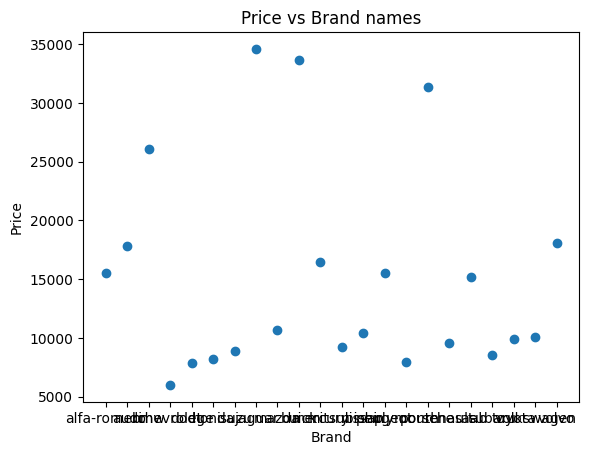

In [20]:

plt.scatter(data['CarName'].unique(), avg_price)
plt.xlabel('Brand')
plt.ylabel('Price')
plt.title('Price vs Brand names')
plt.show()

**Q**: What is target encoding?

Target encoding replaces categorical labels with numerical values that reflect the target variable's mean or median value for that category. This allows machine learning models to process categorical data.

**Q**: What type of encoding should be done on car names column? Why?

We will use **target encoding**.

* because, there are 22 different car names. If one-hot encoding is done, 22 columns f=will be added to the dataset. This cannot be allowed since there are very less samples in our dataframe.
* Target encoding can capture non-linear relationships between the categorical variable and the target variable. This is because the target means or medians can vary non-linearly across different categories.
* The encoded values directly represent the average or median target value for each category, providing insights into the relationship between the categorical variable and the target.

**Q**: Why not use label encoding on car names?

 * When using label encoding with categorical variables that have many unique values, it can introduce multicollinearity. This is because the encoded values are highly correlated with each other.
 * Label encoding can make it difficult to interpret the model's results, especially when dealing with categorical variables with many unique values. The encoded values may not have a clear meaning, making it challenging to understand the model's predictions
 * If there's a non-linear relationship between the categorical variable and the target variable, label encoding might not capture this relationship effectively.

**Q** What type of encoding to use on cylinder number?

We will use ordinal encoding as cylinder number has an order.

In [21]:
data['cylindernumber'].unique()

['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
Categories (7, object): ['eight', 'five', 'four', 'six', 'three', 'twelve', 'two']

In [22]:
data['cylindernumber'] = data['cylindernumber'].astype(str)
data['cylindernumber'] = data['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})
data['cylindernumber'] =pd.to_numeric( data['cylindernumber'])

C:\Users\abhin\AppData\Local\Temp\ipykernel_5340\677539856.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['cylindernumber'] = data['cylindernumber'].replace({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})


In [23]:
data['cylindernumber']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

**Q**: What type of encoding shall be done on other categorical features?

In [24]:
category_list.remove('CarName')
category_list.remove('cylindernumber')
other_columns = category_list
print(other_columns)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']


In [25]:
for i in other_columns:
    print(f"{i} has features {list(data[i].unique())}")

fueltype has features ['gas', 'diesel']
aspiration has features ['std', 'turbo']
doornumber has features ['two', 'four']
carbody has features ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
drivewheel has features ['rwd', 'fwd', '4wd']
enginelocation has features ['front', 'rear']
enginetype has features ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']
fuelsystem has features ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']


These features can be one-hot encoded.

**4. Train-test split**

In [26]:
X = data.iloc[:,:-1]
y = pd.DataFrame(data.iloc[:,-1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20249)

#### **STEP 4**: IMPLEMENTING THE REGRESSION MODEL

**Q**: Is a column transformer necessary to encode categorical columns in our dataset?

* ColumnTransformer can be used to apply different transformations to different columns.
* It allows you to flexibly apply different encoding techniques to different columns based on their characteristics.
* The ColumnTransformer is a powerful tool for defining custom preprocessing pipelines.

In [28]:
# encoding multiple columns with column transformer
encodings = ColumnTransformer([('target_encoder', TargetEncoder(smoothing = 1), ['CarName']), 
                               ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'), other_columns)])

**Q**: What are pipelines? How will it be of use in this problem?

Pipelines in machine learning refer to a sequence of steps or transformations applied to data before it is fed into a model. They are often used to streamline the data preprocessing and modeling process, making it more efficient and reproducible.

* in this case, encoding columns seperately can introduce errors
* The Pipeline simplifies the process of combining encoding and modeling steps

In [77]:
# creating a pipeline which will implement the model after encodings
pipeline = Pipeline([('encodings', encodings), ('linear_regression',LinearRegression())])

**Fitting Data into the Pipeline**

In [78]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('encodings',
                 ColumnTransformer(transformers=[('target_encoder',
                                                  TargetEncoder(smoothing=1),
                                                  ['CarName']),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fueltype', 'aspiration',
                                                   'doornumber', 'carbody',
                                                   'drivewheel',
                                                   'enginelocation',
                                                   'enginetype',
                                                   'fuelsystem'])])),
                ('linear_regression', LinearRegression())])

**Running the pipeline on test set**

In [79]:
y_pred = pipeline.predict(X_test)

**Evaluating the pipeline**

In [80]:
R_squared = r2_score(y_test, y_pred)

In [81]:
R_squared

0.6356113729470553

It means that 63.6% of the variance in the variable is explained by the independent variables in our model. This is a decent R squared value.